In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

Autocorrelation function (position)

* update numerator in analytical solution since noise0* noise1 = 0
* denominator for cxx is a plus for third term
* understand delta notation

In [6]:
#paramaters
pars = {}
pars['a00'] = - 21*10**-6
pars['a01'] = 1
pars['a10'] = - 1.348*10**-3
pars['a11'] = -1
pars['gamma0'] = 8.72*10**-6
pars['gamma1'] = 54.8*10**-3

pars['kbT'] = 4.1*10**-21
pars['noise0'] = np.sqrt(2*pars['gamma0']*pars['kbT'])
pars['noise1'] = np.sqrt(4.916*10**-12)

pars['Df'] = 4.916*10**-12
pars['Dx'] = 2*pars['gamma0']*pars['kbT']
pars['k'] = 21*10**-6
pars['kbar'] = 1.348*10**-3

In [7]:
def analytical_soln_acf_generic(omega_list, pars):

    autocorr_list = []
    for omega in omega_list:
        numerator = ( pars['a11']**2 * pars['noise0']**2 ) \
        + ( pars['a01']**2 * pars['noise1']**2 ) \
        + ( (omega**2) * (pars['gamma1']**2) * (pars['noise0']**2) )

        denominator = ( -2*pars['a11']*pars['a00']*pars['a10']*pars['a01'] ) \
        + ( (omega**2) * (pars['gamma0']**2) * (pars['a11']**2) ) \
        + ( ( (pars['a10']*pars['a01']) + (pars['gamma0']*pars['gamma1']* (omega**2) ) )**2) \
        + ( (pars['a00']**2) * ( (pars['a11']**2) + (omega**2) * (pars['gamma1']**2) ) )

        autocorr = numerator/denominator
        autocorr_list.append(autocorr)
    return autocorr_list

sanity check

In [8]:
def analytical_soln_acf_paper(omega_list, pars):
    cxx_list = []
    for omega_ in omega_list:

        numerator_ = pars['Df'] + (pars['Dx']*(1 + ((pars['gamma1']**2) * (omega_**2))))
        denominator_ = 2*pars['k']*pars['kbar'] + ( (pars['gamma0']**2) * (omega_**2) ) \
        + ( (pars['kbar'] - pars['gamma0']*pars['gamma1']*(omega_**2) )**2) \
        + ( (pars['k']**2) *(1 + ((pars['gamma1']**2) * (omega_**2))) )

        cxx = numerator_/denominator_
        cxx_list.append(cxx)
    return cxx_list

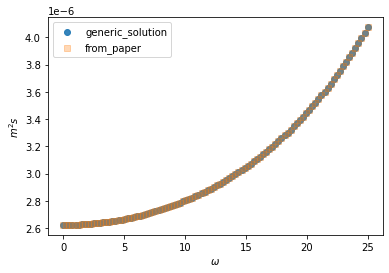

In [21]:
omega_list = np.linspace(0, 25, 100)
generic_soln = analytical_soln_acf_generic(omega_list, pars)
paper_soln = analytical_soln_acf_paper(omega_list, pars)
plt.scatter(omega_list, generic_soln, alpha = 0.9, label='generic_solution')
plt.scatter(omega_list, paper_soln, marker = 's', alpha = 0.3, label='from_paper')
plt.xlabel('$\omega$')
plt.ylabel('$m^2 s$')
plt.legend()
plt.show()

In [23]:
omega_list

array([ 0.        ,  0.25252525,  0.50505051,  0.75757576,  1.01010101,
        1.26262626,  1.51515152,  1.76767677,  2.02020202,  2.27272727,
        2.52525253,  2.77777778,  3.03030303,  3.28282828,  3.53535354,
        3.78787879,  4.04040404,  4.29292929,  4.54545455,  4.7979798 ,
        5.05050505,  5.3030303 ,  5.55555556,  5.80808081,  6.06060606,
        6.31313131,  6.56565657,  6.81818182,  7.07070707,  7.32323232,
        7.57575758,  7.82828283,  8.08080808,  8.33333333,  8.58585859,
        8.83838384,  9.09090909,  9.34343434,  9.5959596 ,  9.84848485,
       10.1010101 , 10.35353535, 10.60606061, 10.85858586, 11.11111111,
       11.36363636, 11.61616162, 11.86868687, 12.12121212, 12.37373737,
       12.62626263, 12.87878788, 13.13131313, 13.38383838, 13.63636364,
       13.88888889, 14.14141414, 14.39393939, 14.64646465, 14.8989899 ,
       15.15151515, 15.4040404 , 15.65656566, 15.90909091, 16.16161616,
       16.41414141, 16.66666667, 16.91919192, 17.17171717, 17.42

Part 2

It'd be nice to make some plots for Cxx(omega) for different values of the parameters. For example when there is no coupling (a01=a10=0) one should expect that x follows a Ornstein Uhlenbeck process and thus its power spectrum should be Lorentzian, i.e. of the type A/(B+Cω^2). 

In [11]:
pars_ou = {}

pars_ou['gamma0'] = 1
pars_ou['gamma1'] = 1

pars_ou['a00'] = -1/pars_ou['gamma0']
pars_ou['a01'] = -0.5/pars_ou['gamma0']
pars_ou['a10'] = -1/pars_ou['gamma1']
pars_ou['a11'] = -0.5/pars_ou['gamma1']

pars_ou['T1'] = 100
pars_ou['T2'] = 100

pars_ou['kb'] = 1.380649*10**-23
pars_ou['noise0'] = np.sqrt( (2*pars_ou['kb']*pars_ou['T1'])/pars_ou['gamma0'])
pars_ou['noise1'] = np.sqrt( (2*pars_ou['kb']*pars_ou['T2'])/pars_ou['gamma1'])


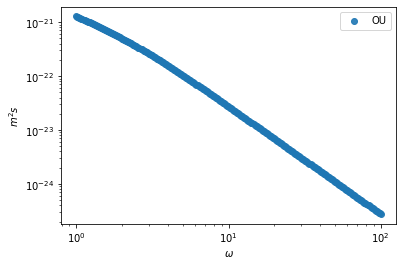

In [17]:
omega_list = np.logspace(0, 2, 300)
ou_process = analytical_soln_acf_generic(omega_list, pars_ou)
plt.scatter(omega_list, ou_process, alpha = 0.9, label='OU')
plt.xlabel('$\omega$')
plt.ylabel('$m^2 s$')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

simulation

In [8]:
dt = 0.5

In [13]:
signal.correlate(x, x[1::], )

array([0.        , 0.05263158, 0.15512465, 0.30470914, 0.49861496,
       0.73407202, 1.00831025, 1.31855956, 1.66204986, 2.03601108,
       2.43767313, 2.86426593, 3.31301939, 3.78116343, 4.26592798,
       4.76454294, 5.27423823, 5.79224377, 6.31578947, 6.84210526,
       6.31578947, 5.79224377, 5.27423823, 4.76454294, 4.26592798,
       3.78116343, 3.31301939, 2.86426593, 2.43767313, 2.03601108,
       1.66204986, 1.31855956, 1.00831025, 0.73407202, 0.49861496,
       0.30470914, 0.15512465, 0.05263158])

In [ ]:
def acf(x,Dt):
    """Inputs: particle position x [m] and timestep Dt [s]."""
    last_element = -1
    ave_position = (x[2:last_element]-x[1:last_element - 1])/Dt
    autocorr = signal.correlate()
    s = Dt*[0:1:length(r)-1];
